In [11]:
import numpy as np
import scipy.ndimage as spndim
import pandas as pd
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colorbar as mcb
import matplotlib.ticker as mtk
import utils.engine as ue
import utils.visualizer as uv

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# with open("Validation/SHEBA_Data/01-forcing.dat") as file:
#     arr = file.readlines()
    
# cols_1 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
# file_1 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
# with open("Validation/SHEBA_Data/02-hs-hi_thickness.dat") as file:
#     arr = file.readlines()
    
# cols_2 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
# file_2 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
# with open("Validation/SHEBA_Data/06-depth_pit.dat") as file:
#     arr = file.readlines()
    
# file_6 = np.array([[float(el) for el in line.split(" ") if el] for line in arr])
# file_6[:, 0] = np.round(file_6[:, 0], 4)

In [ ]:
# with open("Validation/SHEBA_Data/07-pit_fcond.dat") as file:
#     arr = file.readlines()
    
# cols_7 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
# file_7 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
# with open("Validation/SHEBA_Data/08-tocn.dat") as file:
#     arr = file.readlines()
    
# file_8 = np.array([[float(el) for el in line.split(" ") if el] for line in arr])

In [ ]:
# with open("Validation/SHEBA_Data/09-focn.dat") as file:
#     arr = file.readlines()
    
# cols_9 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
# file_9 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
# with open("Validation/SHEBA_Data/10-temp.dat") as file:
#     arr = file.readlines()
    
# file_10 = np.array([[float(el) for el in line.split(" ") if el] for line in arr])

In [ ]:
# with open("Validation/SHEBA_Data/11-turbflux.dat") as file:
#     arr = file.readlines()
    
# cols_11 = [colname.replace('\n', '') for colname in arr[0].split(" ") if colname]
# file_11 = np.array([[float(el) for el in line.split(" ") if el] for line in arr[1:]])

In [ ]:
# data = pd.DataFrame(file_1, columns=cols_1)

# data_2 = pd.DataFrame(file_2, columns=cols_2)
# data = data.merge(data_2.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_2['jday']*1000).astype('int32')).iloc[:, 1:]

# data_6 = pd.DataFrame(file_6, columns=['jday', 'hs', 'hi', 'hs_level', 'hf_level', 'hi_level'])
# data = data.merge(data_6.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_6['jday']*1000).astype('int32')).iloc[:, 1:]

# data_7 = pd.DataFrame(file_7, columns=cols_7)
# data = data.merge(data_7.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_7['jday']*1000).astype('int32')).iloc[:, 1:]

# data_8 = pd.DataFrame(file_8, columns=['jday', 'Tocn'])
# data = data.merge(data_8.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_8['jday']*1000).astype('int32')).iloc[:, 1:]

# data_9 = pd.DataFrame(file_9, columns=cols_9)
# data = data.merge(data_9.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_9['jday']*1000).astype('int32')).iloc[:, 1:]

# data_10 = pd.DataFrame(file_10, columns=['jday'] + ['T_{}'.format(i) for i in range(1, 51)])
# data = data.merge(data_10.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_10['jday']*1000).astype('int32')).iloc[:, 1:]

# data_11 = pd.DataFrame(file_11, columns=cols_11)
# data = data.merge(data_11.iloc[:, 1:],
#                   left_on=(data['jday']*1000).astype('int32'),
#                   right_on=(data_11['jday']*1000).astype('int32')).iloc[:, 1:]

In [ ]:
# data.to_csv('Validation/full_data.csv', index=False)

In [6]:
with open("Validation/12-levels.dat") as file:
    Z = [float(z.replace(' ', '')[:-1]) for z in file.readlines()]

In [7]:
data = pd.read_csv('Validation/full_data.csv')

In [8]:
data.columns

Index(['jday', 'uair', 'tair', 'qair', 'lwdo', 'swdo', 'prec', 'Focn_x',
       'albe', 'hs_best', 'hf_best', 'hi_best', 'hs_x', 'hi_x', 'hs_level',
       'hf_level', 'hi_level', 'Tss', 'Tis', 'Tib', 'Tsurf', 'hs_y', 'hi_y',
       'hf', 'Fcss', 'Fcsb', 'Fcis', 'Fcib', 'Fmib', 'Focn_y', 'Trod', 'Fcsf',
       'Tocn', 'focn_pit', 'T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6', 'T_7',
       'T_8', 'T_9', 'T_10', 'T_11', 'T_12', 'T_13', 'T_14', 'T_15', 'T_16',
       'T_17', 'T_18', 'T_19', 'T_20', 'T_21', 'T_22', 'T_23', 'T_24', 'T_25',
       'T_26', 'T_27', 'T_28', 'T_29', 'T_30', 'T_31', 'T_32', 'T_33', 'T_34',
       'T_35', 'T_36', 'T_37', 'T_38', 'T_39', 'T_40', 'T_41', 'T_42', 'T_43',
       'T_44', 'T_45', 'T_46', 'T_47', 'T_48', 'T_49', 'T_50', 'fsen', 'flat',
       'Tib_interp', 'Tis_interp', 'Tss_interp', 'prec_eff'],
      dtype='object')

In [ ]:
prec = 5.
cmap_base = plt.get_cmap('rainbow')
vmin = data.loc[:, 'T_1':'T_50'].values.min()
vmax = data.loc[:, 'T_1':'T_50'].values.max()

boundaries = np.concatenate(([vmin], np.arange(np.floor(vmin + prec), vmax, prec), [vmax]))
centers = (boundaries[1:] + boundaries[:-1])/2
centers_scaled = (centers - vmin) / (vmax - vmin)

cmap_custom = clr.ListedColormap([cmap_base(x) for x in centers_scaled])
norm_custom = clr.BoundaryNorm(boundaries, cmap_custom.N)

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(data.loc[:, 'T_1':'T_50'].T,
           aspect='auto', cmap=cmap_custom, norm=norm_custom,
           extent=[data.loc[0, 'jday'], data.loc[data.index[-1], 'jday'], Z[-1], Z[0]])
plt.plot(data['jday'], data['hs_level'], color='white', lw=3, ls=':', label='snow surface')
plt.plot(data['jday'], data['hf_level'], color='white', lw=3, ls='--', label='snow-ice interface')
plt.plot(data['jday'], data['hi_level'], color='white', lw=3, label='ice base')
plt.plot(data['jday'], data['hs_best'], color='black', lw=3, ls=':', label='snow surface best')
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(loc='lower left', facecolor='black', labelcolor='white', prop={'size': 20})
plt.colorbar(ticks=boundaries)
# plt.savefig('test-image.png', dpi=150)
plt.show()

Судя по статье (Fig.5 (a), (b)), чёрные точки - это метод приближения, использованный в статье Хувальда

In [9]:
# sigma mesh
dsigma_ice = np.full(20, 1.0/20)
dsigma_snow = np.full(5, 1.0/5)

In [14]:
# init state from data
T_ice_init, T_snow_init, Toi_init, Tis_init, Tsa_init, \
dzi_init, dzs_init = ue.get_init_from_data(data, Z, dsigma_ice, dsigma_snow)

# time_arr = ((data['jday'] - data.loc[0, 'jday'])*24*3600).values
time_arr = data['jday'].values

In [15]:
# process from data
process_data = ue.process_from_data(Z,
                                    data.loc[:, 'T_1':'T_50'].values, 
                                    data['Tib_interp'].values, data['Tis_interp'].values,
                                    data['Tss'].values,
                                    data['hi_best'].values, data['hf_best'].values,
                                    data['hs_best'].values,
                                    np.ones(20)/20.0, np.ones(5)/5.0,
                                    time_arr, ue.rho_i)

[[0.097    0.097    0.097    ... 0.097    0.097    0.097   ]
 [0.097005 0.097005 0.097005 ... 0.097005 0.097005 0.097005]
 [0.09701  0.09701  0.09701  ... 0.09701  0.09701  0.09701 ]
 ...
 [0.075335 0.075335 0.075335 ... 0.075335 0.075335 0.075335]
 [0.075335 0.075335 0.075335 ... 0.075335 0.075335 0.075335]
 [0.07533  0.07533  0.07533  ... 0.07533  0.07533  0.07533 ]]
[[0.032   0.032   0.032   0.032   0.032  ]
 [0.03196 0.03196 0.03196 0.03196 0.03196]
 [0.03192 0.03192 0.03192 0.03192 0.03192]
 ...
 [0.02334 0.02334 0.02334 0.02334 0.02334]
 [0.02334 0.02334 0.02334 0.02334 0.02334]
 [0.02336 0.02336 0.02336 0.02336 0.02336]]


In [16]:
# forcing
e_s = lambda T: 6.11*np.exp(ue.c1_i*T/(T + ue.T0 - ue.c2_i))
q_surf = lambda T: 0.622*e_s(T)/(ue.P_surf - 0.378*e_s(T))

albe = data['albe'].values
Tib_interp = data['Tib_interp'].values
tair = data['tair'].values
uair = data['uair'].values
qair = data['qair'].values
prec = data['prec_eff'].values
swdo = data['swdo'].values
lwdo = data['lwdo'].values
focn_pit = data['focn_pit'].values
Focn_y = data['Focn_y'].values


find_index_fast = lambda time_sec: np.searchsorted(time_arr, time_sec, side='right') - 1
albedo = lambda time: albe[find_index_fast(time)]
Toi = lambda time: Tib_interp[find_index_fast(time)]
T_a = lambda time: tair[find_index_fast(time)] - ue.T0
u_a = lambda time: uair[find_index_fast(time)]
q_a = lambda time: qair[find_index_fast(time)] * 1e-3
p = lambda time: prec[find_index_fast(time)] * ue.mmd_to_ms
F_sw = lambda time: swdo[find_index_fast(time)]
F_lw = lambda time: lwdo[find_index_fast(time)]
F_bolz = lambda T: -ue.sigma*(T + ue.T0)**4
F_sh = lambda T, time: ue.rho_a*ue.c_pa*ue.C_sh*u_a(time)*(T_a(time) - T)
F_lh = lambda T, time: ue.rho_a*ue.L_s0*ue.C_lh*u_a(time)*(q_a(time) - q_surf(T))
F_P = lambda T, time: p(time)*ue.rho_w*ue.c_pw*max(T_a(time) - T, 0)
F_atm = lambda T, time, i_0: ue.emissivity*(F_lw(time) + F_bolz(T)) \
                           + (1 - albedo(time))*(1 - i_0)*F_sw(time) \
                           + F_sh(T, time) + F_P(T, time) + F_lh(T, time) 

F_atm_ice = lambda T, time: F_atm(T, time, ue.i0_i)
F_atm_snow = lambda T, time: F_atm(T, time, ue.i0_s)
F_ocn = lambda T, time: Focn_y[find_index_fast(time)]

In [29]:
%%time
process_sim = ue.main_process \
(
    time_step=3600.0,
    time_end=7774*3600.0,
    N_pseudoiter=50,
    Ti_init=T_ice_init,
    Ts_init=T_snow_init,
    Tis_init=Tis_init,
    Tsa_init=Tsa_init,
    dzi_init=dzi_init,
    dzs_init=dzs_init,
    salinity=np.linspace(4.0, 1.0, len(dzi_init)),
    snow_thickness_threshold=0.01,
    Toi=Toi,
    Ta=T_a,
    p=p,
    F_atm_ice=F_atm_ice,
    F_atm_snow=F_atm_snow,
    F_sw=F_sw,
    F_ocn=F_ocn,
    json_output_folder='test',
    json_ice_prefix='ice_sim',
    json_snow_prefix='snow_sim'
)

Time 1.0 h.: Snow-ice freezing...
Time 2.0 h.: Snow-ice freezing...
Time 3.0 h.: Snow-ice freezing...
Time 3.0 h.: Snow-ice melting...
Time 4.0 h.: Snow-ice freezing...
Time 4.0 h.: Snow-ice melting...
Time 5.0 h.: Snow-ice freezing...
Time 5.0 h.: Snow-ice melting...
Time 6.0 h.: Snow-ice freezing...
Time 6.0 h.: Snow-ice melting...
Time 7.0 h.: Snow-ice freezing...
Time 7.0 h.: Snow-ice melting...
Time 8.0 h.: Snow-ice freezing...
Time 8.0 h.: Snow-ice melting...
Time 9.0 h.: Snow-ice freezing...
Time 9.0 h.: Snow-ice melting...
Time 10.0 h.: Snow-ice freezing...
Time 10.0 h.: Snow-ice melting...
Time 11.0 h.: Snow-ice freezing...
Time 11.0 h.: Snow-ice melting...
Time 12.0 h.: Snow-ice freezing...
Time 12.0 h.: Snow-ice melting...
Time 13.0 h.: Snow-ice freezing...
Time 13.0 h.: Snow-ice melting...
Time 14.0 h.: Snow-ice freezing...
Time 14.0 h.: Snow-ice melting...
Time 15.0 h.: Snow-ice freezing...
Time 15.0 h.: Snow-ice melting...
Time 16.0 h.: Snow-ice freezing...
Time 16.0 h.: 

Time 123.0 h.: Snow-ice freezing...
Time 123.0 h.: Snow-ice melting...
Time 124.0 h.: Snow-ice freezing...
Time 124.0 h.: Snow-ice melting...
Time 125.0 h.: Snow-ice freezing...
Time 125.0 h.: Snow-ice melting...
Time 126.0 h.: Snow-ice freezing...
Time 126.0 h.: Snow-ice melting...
Time 127.0 h.: Snow-ice freezing...
Time 127.0 h.: Snow-ice melting...
Time 128.0 h.: Snow-ice freezing...
Time 128.0 h.: Snow-ice melting...
Time 129.0 h.: Snow-ice freezing...
Time 129.0 h.: Snow-ice melting...
Time 130.0 h.: Snow-ice freezing...
Time 130.0 h.: Snow-ice melting...
Time 131.0 h.: Snow-ice freezing...
Time 131.0 h.: Snow-ice melting...
Time 132.0 h.: Snow-ice freezing...
Time 132.0 h.: Snow-ice melting...
Time 133.0 h.: Snow-ice freezing...
Time 133.0 h.: Snow-ice melting...
Time 134.0 h.: Snow-ice freezing...
Time 134.0 h.: Snow-ice melting...
Time 135.0 h.: Snow-ice freezing...
Time 135.0 h.: Snow-ice melting...
Time 136.0 h.: Snow-ice freezing...
Time 136.0 h.: Snow-ice melting...
Time 1

Time 240.0 h.: Snow-ice melting...
Time 241.0 h.: Snow-ice freezing...
Time 241.0 h.: Snow-ice melting...
Time 242.0 h.: Snow-ice freezing...
Time 242.0 h.: Snow-ice melting...
Time 243.0 h.: Snow-ice freezing...
Time 243.0 h.: Snow-ice melting...
Time 244.0 h.: Snow-ice freezing...
Time 244.0 h.: Snow-ice melting...
Time 245.0 h.: Snow-ice freezing...
Time 245.0 h.: Snow-ice melting...
Time 246.0 h.: Snow-ice freezing...
Time 246.0 h.: Snow-ice melting...
Time 247.0 h.: Snow-ice freezing...
Time 247.0 h.: Snow-ice melting...
Time 248.0 h.: Snow-ice freezing...
Time 248.0 h.: Snow-ice melting...
Time 249.0 h.: Snow-ice freezing...
Time 249.0 h.: Snow-ice melting...
Time 250.0 h.: Snow-ice freezing...
Time 250.0 h.: Snow-ice melting...
Time 251.0 h.: Snow-ice freezing...
Time 251.0 h.: Snow-ice melting...
Time 252.0 h.: Snow-ice freezing...
Time 252.0 h.: Snow-ice melting...
Time 253.0 h.: Snow-ice freezing...
Time 253.0 h.: Snow-ice melting...
Time 254.0 h.: Snow-ice freezing...
Time 2

Time 356.0 h.: Snow-ice melting...
Time 357.0 h.: Snow-ice freezing...
Time 357.0 h.: Snow-ice melting...
Time 358.0 h.: Snow-ice freezing...
Time 358.0 h.: Snow-ice melting...
Time 359.0 h.: Snow-ice freezing...
Time 359.0 h.: Snow-ice melting...
Time 360.0 h.: Snow-ice freezing...
Time 360.0 h.: Snow-ice melting...
Time 361.0 h.: Snow-ice freezing...
Time 361.0 h.: Snow-ice melting...
Time 362.0 h.: Snow-ice freezing...
Time 362.0 h.: Snow-ice melting...
Time 363.0 h.: Snow-ice freezing...
Time 363.0 h.: Snow-ice melting...
Time 364.0 h.: Snow-ice freezing...
Time 364.0 h.: Snow-ice melting...
Time 365.0 h.: Snow-ice freezing...
Time 365.0 h.: Snow-ice melting...
Time 366.0 h.: Snow-ice freezing...
Time 366.0 h.: Snow-ice melting...
Time 367.0 h.: Snow-ice freezing...
Time 367.0 h.: Snow-ice melting...
Time 368.0 h.: Snow-ice freezing...
Time 368.0 h.: Snow-ice melting...
Time 369.0 h.: Snow-ice freezing...
Time 369.0 h.: Snow-ice melting...
Time 370.0 h.: Snow-ice freezing...
Time 3

Time 472.0 h.: Snow-ice freezing...
Time 472.0 h.: Snow-ice melting...
Time 473.0 h.: Snow-ice freezing...
Time 473.0 h.: Snow-ice melting...
Time 474.0 h.: Snow-ice freezing...
Time 474.0 h.: Snow-ice melting...
Time 475.0 h.: Snow-ice freezing...
Time 475.0 h.: Snow-ice melting...
Time 476.0 h.: Snow-ice freezing...
Time 476.0 h.: Snow-ice melting...
Time 477.0 h.: Snow-ice freezing...
Time 477.0 h.: Snow-ice melting...
Time 478.0 h.: Snow-ice freezing...
Time 478.0 h.: Snow-ice melting...
Time 479.0 h.: Snow-ice freezing...
Time 479.0 h.: Snow-ice melting...
Time 480.0 h.: Snow-ice freezing...
Time 480.0 h.: Snow-ice melting...
Time 481.0 h.: Snow-ice freezing...
Time 481.0 h.: Snow-ice melting...
Time 482.0 h.: Snow-ice freezing...
Time 482.0 h.: Snow-ice melting...
Time 483.0 h.: Snow-ice freezing...
Time 483.0 h.: Snow-ice melting...
Time 484.0 h.: Snow-ice freezing...
Time 484.0 h.: Snow-ice melting...
Time 485.0 h.: Snow-ice freezing...
Time 485.0 h.: Snow-ice melting...
Time 4

Time 589.0 h.: Snow-ice freezing...
Time 589.0 h.: Snow-ice melting...
Time 590.0 h.: Snow-ice freezing...
Time 590.0 h.: Snow-ice melting...
Time 591.0 h.: Snow-ice freezing...
Time 591.0 h.: Snow-ice melting...
Time 592.0 h.: Snow-ice freezing...
Time 592.0 h.: Snow-ice melting...
Time 593.0 h.: Snow-ice freezing...
Time 593.0 h.: Snow-ice melting...
Time 594.0 h.: Snow-ice freezing...
Time 594.0 h.: Snow-ice melting...
Time 595.0 h.: Snow-ice freezing...
Time 595.0 h.: Snow-ice melting...
Time 596.0 h.: Snow-ice freezing...
Time 596.0 h.: Snow-ice melting...
Time 597.0 h.: Snow-ice freezing...
Time 597.0 h.: Snow-ice melting...
Time 598.0 h.: Snow-ice freezing...
Time 598.0 h.: Snow-ice melting...
Time 599.0 h.: Snow-ice freezing...
Time 599.0 h.: Snow-ice melting...
Time 600.0 h.: Snow-ice freezing...
Time 600.0 h.: Snow-ice melting...
Time 601.0 h.: Snow-ice freezing...
Time 601.0 h.: Snow-ice melting...
Time 602.0 h.: Snow-ice freezing...
Time 602.0 h.: Snow-ice melting...
Time 6

Time 707.0 h.: Snow-ice melting...
Time 708.0 h.: Snow-ice freezing...
Time 708.0 h.: Snow-ice melting...
Time 709.0 h.: Snow-ice freezing...
Time 709.0 h.: Snow-ice melting...
Time 710.0 h.: Snow-ice freezing...
Time 710.0 h.: Snow-ice melting...
Time 711.0 h.: Snow-ice freezing...
Time 711.0 h.: Snow-ice melting...
Time 712.0 h.: Snow-ice freezing...
Time 712.0 h.: Snow-ice melting...
Time 713.0 h.: Snow-ice freezing...
Time 713.0 h.: Snow-ice melting...
Time 714.0 h.: Snow-ice freezing...
Time 714.0 h.: Snow-ice melting...
Time 715.0 h.: Snow-ice freezing...
Time 715.0 h.: Snow-ice melting...
Time 716.0 h.: Snow-ice freezing...
Time 716.0 h.: Snow-ice melting...
Time 717.0 h.: Snow-ice freezing...
Time 717.0 h.: Snow-ice melting...
Time 718.0 h.: Snow-ice freezing...
Time 718.0 h.: Snow-ice melting...
Time 719.0 h.: Snow-ice freezing...
Time 719.0 h.: Snow-ice melting...
Time 720.0 h.: Snow-ice freezing...
Time 720.0 h.: Snow-ice melting...
Time 721.0 h.: Snow-ice freezing...
Time 7

Time 824.0 h.: Snow-ice melting...
Time 825.0 h.: Snow-ice freezing...
Time 825.0 h.: Snow-ice melting...
Time 826.0 h.: Snow-ice freezing...
Time 826.0 h.: Snow-ice melting...
Time 827.0 h.: Snow-ice freezing...
Time 827.0 h.: Snow-ice melting...
Time 828.0 h.: Snow-ice freezing...
Time 828.0 h.: Snow-ice melting...
Time 829.0 h.: Snow-ice freezing...
Time 829.0 h.: Snow-ice melting...
Time 830.0 h.: Snow-ice freezing...
Time 830.0 h.: Snow-ice melting...
Time 831.0 h.: Snow-ice freezing...
Time 831.0 h.: Snow-ice melting...
Time 832.0 h.: Snow-ice freezing...
Time 832.0 h.: Snow-ice melting...
Time 833.0 h.: Snow-ice freezing...
Time 833.0 h.: Snow-ice melting...
Time 834.0 h.: Snow-ice freezing...
Time 834.0 h.: Snow-ice melting...
Time 835.0 h.: Snow-ice freezing...
Time 835.0 h.: Snow-ice melting...
Time 836.0 h.: Snow-ice freezing...
Time 836.0 h.: Snow-ice melting...
Time 837.0 h.: Snow-ice freezing...
Time 837.0 h.: Snow-ice melting...
Time 838.0 h.: Snow-ice freezing...
Time 8

Time 941.0 h.: Snow-ice freezing...
Time 941.0 h.: Snow-ice melting...
Time 942.0 h.: Snow-ice freezing...
Time 942.0 h.: Snow-ice melting...
Time 943.0 h.: Snow-ice freezing...
Time 943.0 h.: Snow-ice melting...
Time 944.0 h.: Snow-ice freezing...
Time 944.0 h.: Snow-ice melting...
Time 945.0 h.: Snow-ice freezing...
Time 945.0 h.: Snow-ice melting...
Time 946.0 h.: Snow-ice freezing...
Time 946.0 h.: Snow-ice melting...
Time 947.0 h.: Snow-ice freezing...
Time 947.0 h.: Snow-ice melting...
Time 948.0 h.: Snow-ice freezing...
Time 948.0 h.: Snow-ice melting...
Time 949.0 h.: Snow-ice freezing...
Time 949.0 h.: Snow-ice melting...
Time 950.0 h.: Snow-ice freezing...
Time 950.0 h.: Snow-ice melting...
Time 951.0 h.: Snow-ice freezing...
Time 951.0 h.: Snow-ice melting...
Time 952.0 h.: Snow-ice freezing...
Time 952.0 h.: Snow-ice melting...
Time 953.0 h.: Snow-ice freezing...
Time 953.0 h.: Snow-ice melting...
Time 954.0 h.: Snow-ice freezing...
Time 954.0 h.: Snow-ice melting...
Time 9

Time 1056.0 h.: Snow-ice melting...
Time 1057.0 h.: Snow-ice freezing...
Time 1057.0 h.: Snow-ice melting...
Time 1058.0 h.: Snow-ice freezing...
Time 1058.0 h.: Snow-ice melting...
Time 1059.0 h.: Snow-ice freezing...
Time 1059.0 h.: Snow-ice melting...
Time 1060.0 h.: Snow-ice freezing...
Time 1060.0 h.: Snow-ice melting...
Time 1061.0 h.: Snow-ice freezing...
Time 1061.0 h.: Snow-ice melting...
Time 1062.0 h.: Snow-ice freezing...
Time 1062.0 h.: Snow-ice melting...
Time 1063.0 h.: Snow-ice freezing...
Time 1063.0 h.: Snow-ice melting...
Time 1064.0 h.: Snow-ice freezing...
Time 1064.0 h.: Snow-ice melting...
Time 1065.0 h.: Snow-ice freezing...
Time 1065.0 h.: Snow-ice melting...
Time 1066.0 h.: Snow-ice freezing...
Time 1066.0 h.: Snow-ice melting...
Time 1067.0 h.: Snow-ice freezing...
Time 1067.0 h.: Snow-ice melting...
Time 1068.0 h.: Snow-ice freezing...
Time 1068.0 h.: Snow-ice melting...
Time 1069.0 h.: Snow-ice freezing...
Time 1069.0 h.: Snow-ice melting...
Time 1070.0 h.:

KeyboardInterrupt: 

Bbox(x0=0.125, y0=0.27438502673796794, x1=0.9, y1=0.88)


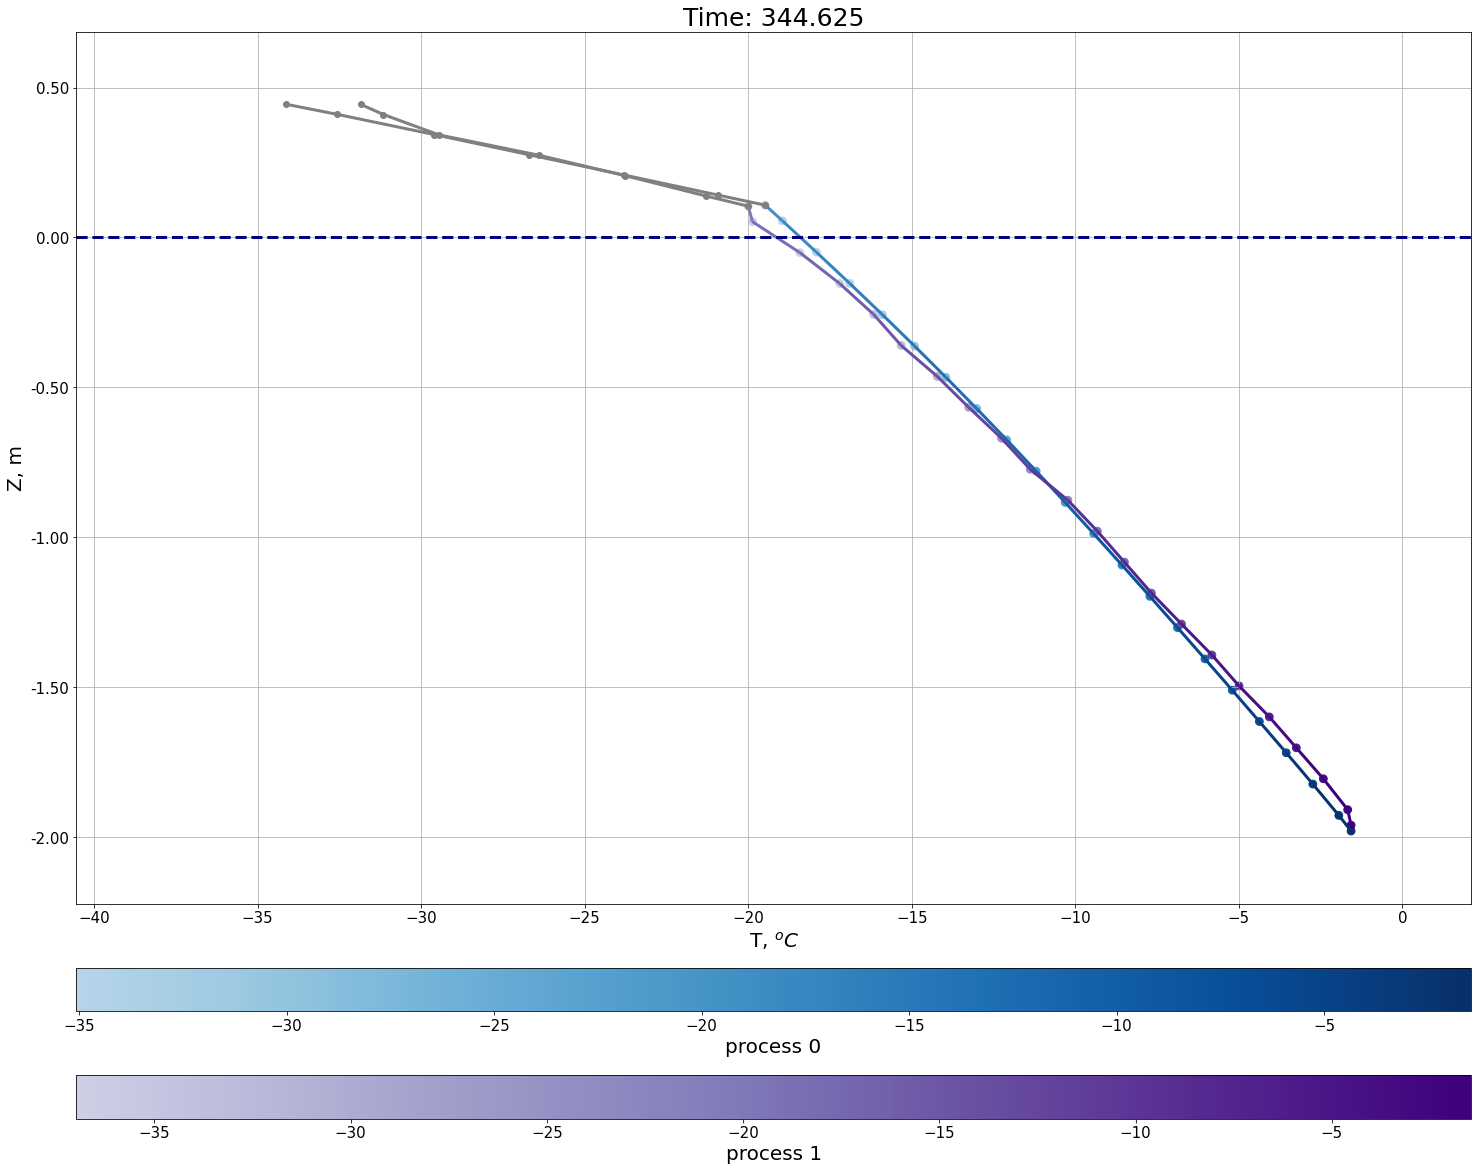

In [686]:
test_anim = uv.animate([process_sim[:1000], process_data[:1000]], interval=100, savepath='test.mp4')

In [670]:
test_anim#.save('test.mp4')

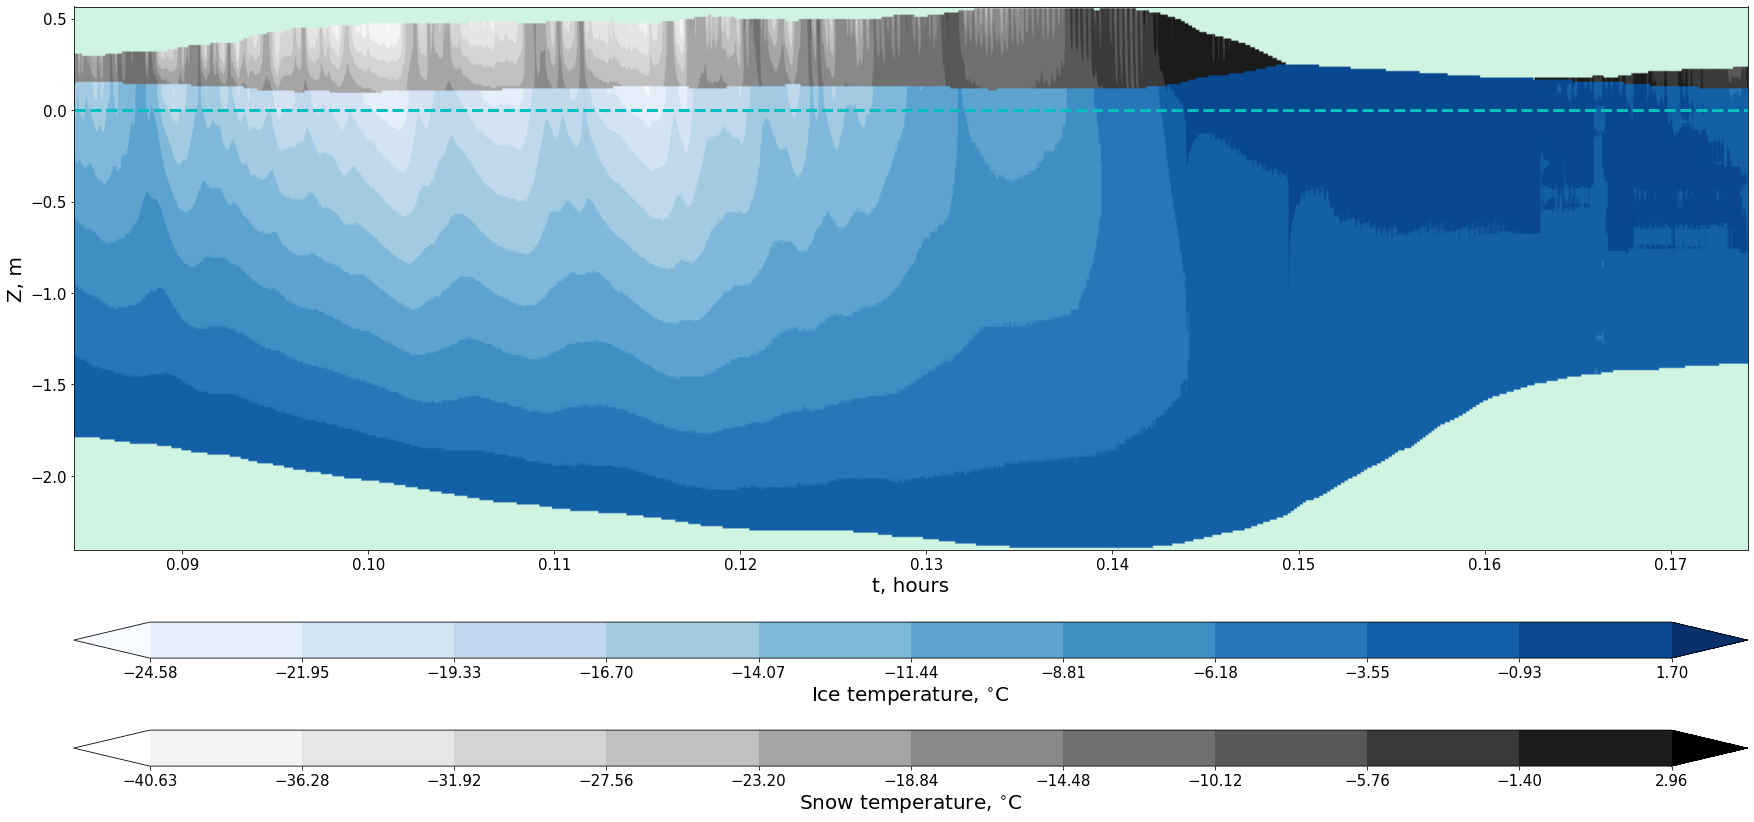

In [53]:
out = uv.timeseries_img(process_data, y_points=250)#, savepath='timeseries.png')

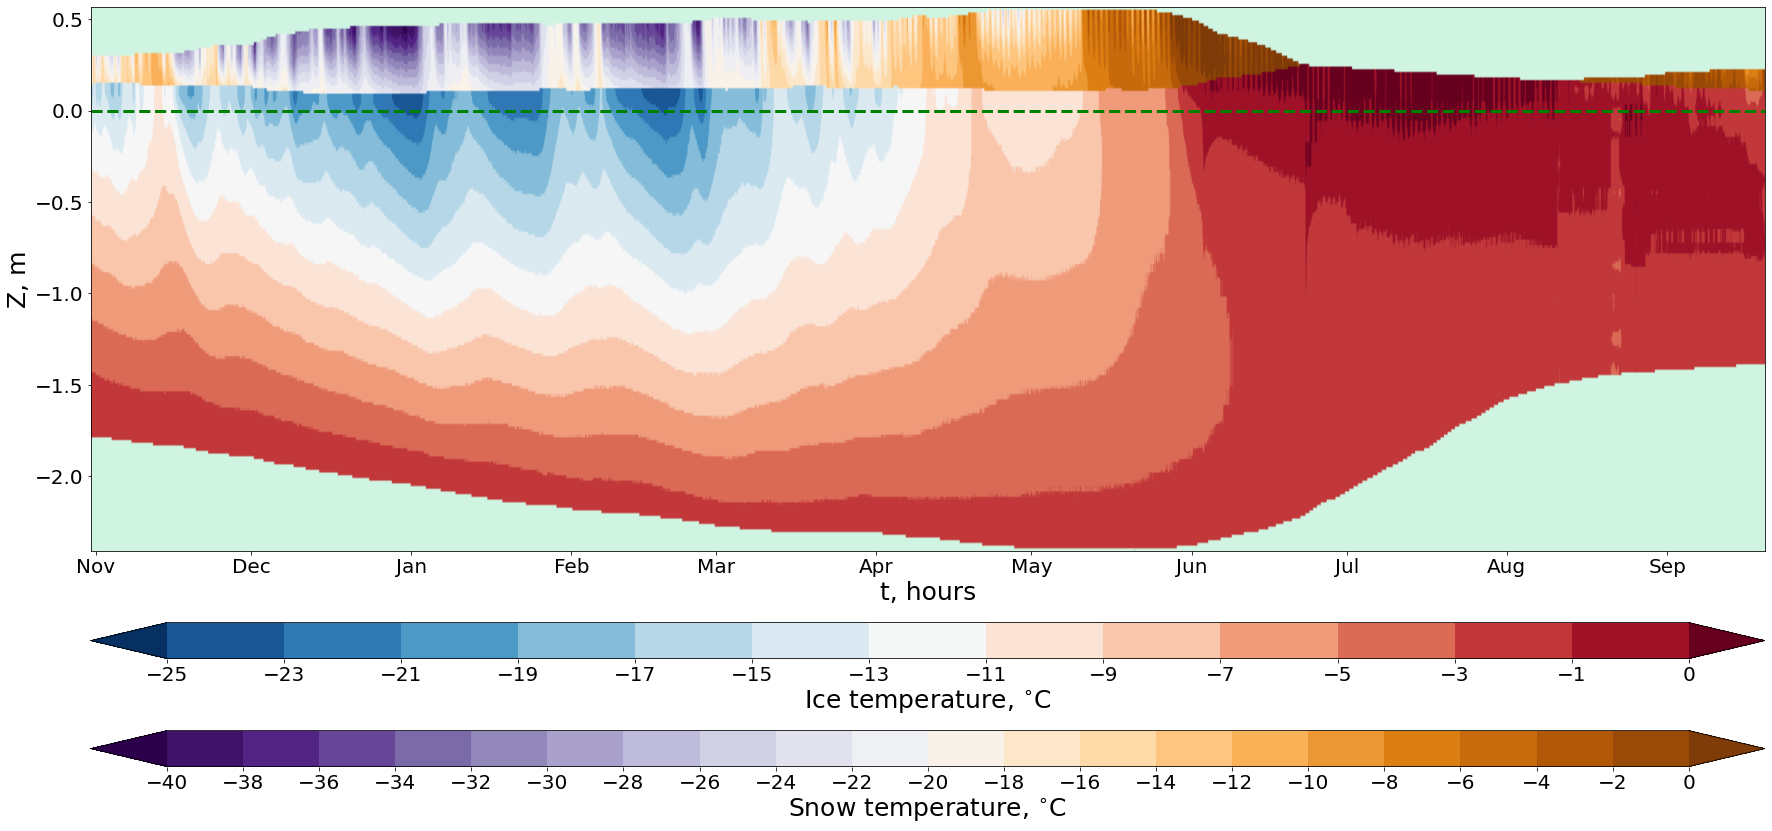

In [69]:
uv.timeseries_img(process_data, y_points=200, mode='month',
                  cmap_ice='RdBu_r', tmin_ice=-25, tmax_ice=0, step_ice=2.0,
                  cmap_snow='PuOr_r', tmin_snow=-40, tmax_snow=0, step_snow=2.0,
                  color_waterline='green', savepath='media/data_SHEBA.png')

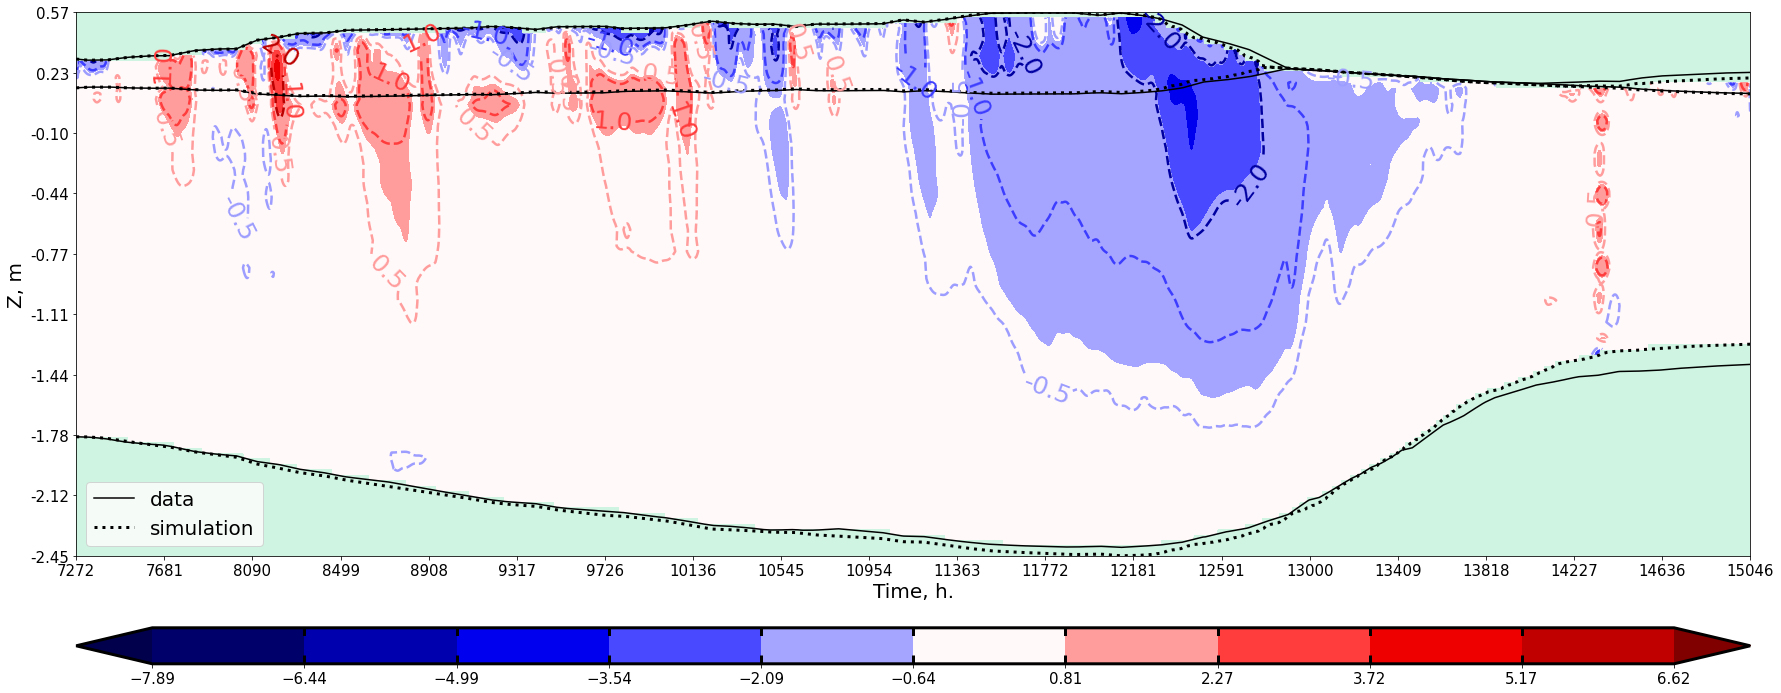

In [680]:
uv.timeseries_err(process_sim, process_data, x_ticks=20, y_ticks=10)

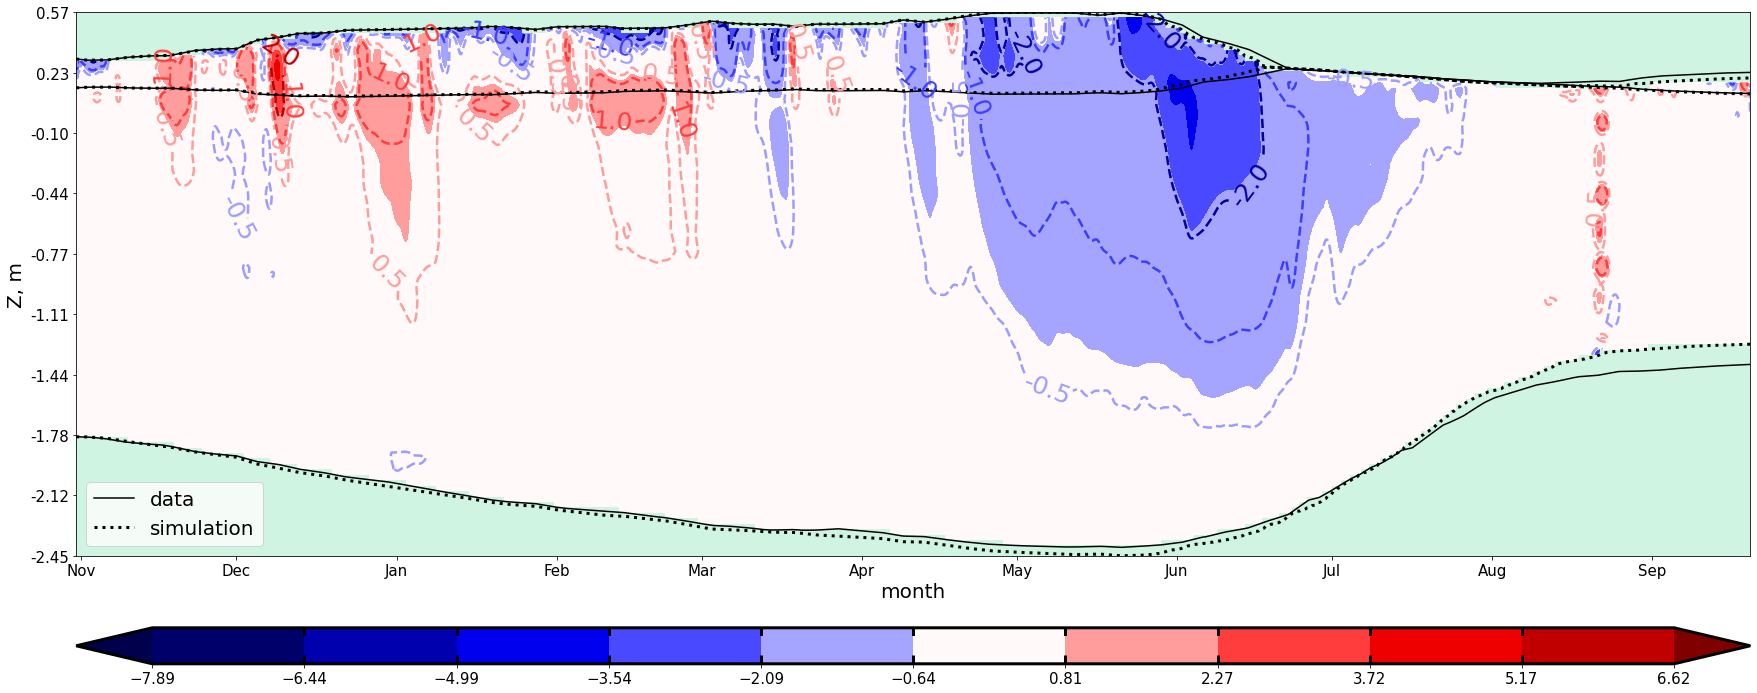

In [679]:
uv.timeseries_err(process_sim, process_data, mode='month', x_ticks=20, y_ticks=10)

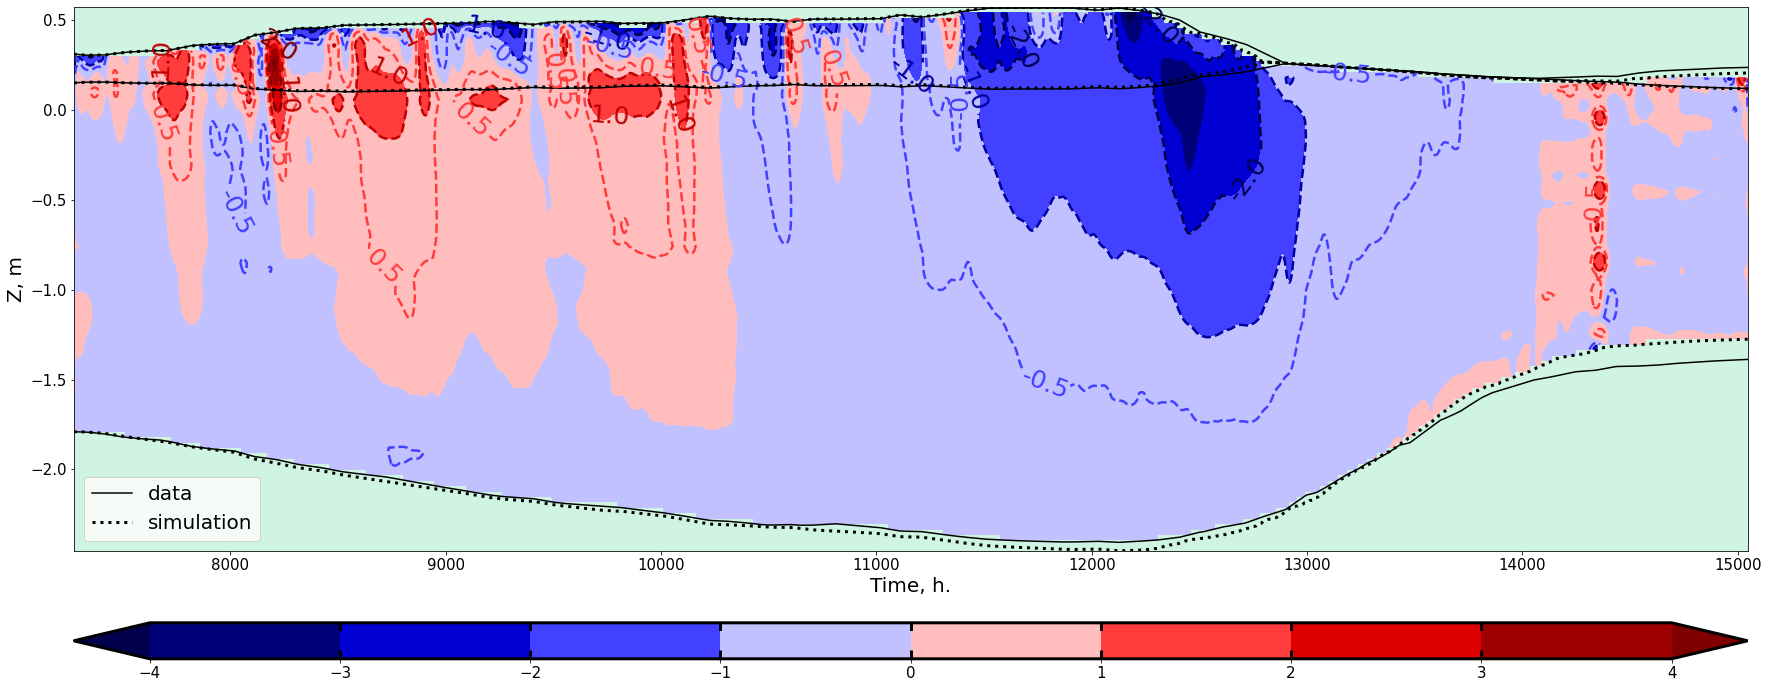

In [677]:
uv.timeseries_err(process_sim, process_data, tmin_err=-4., tmax_err=4., step_err=1.)

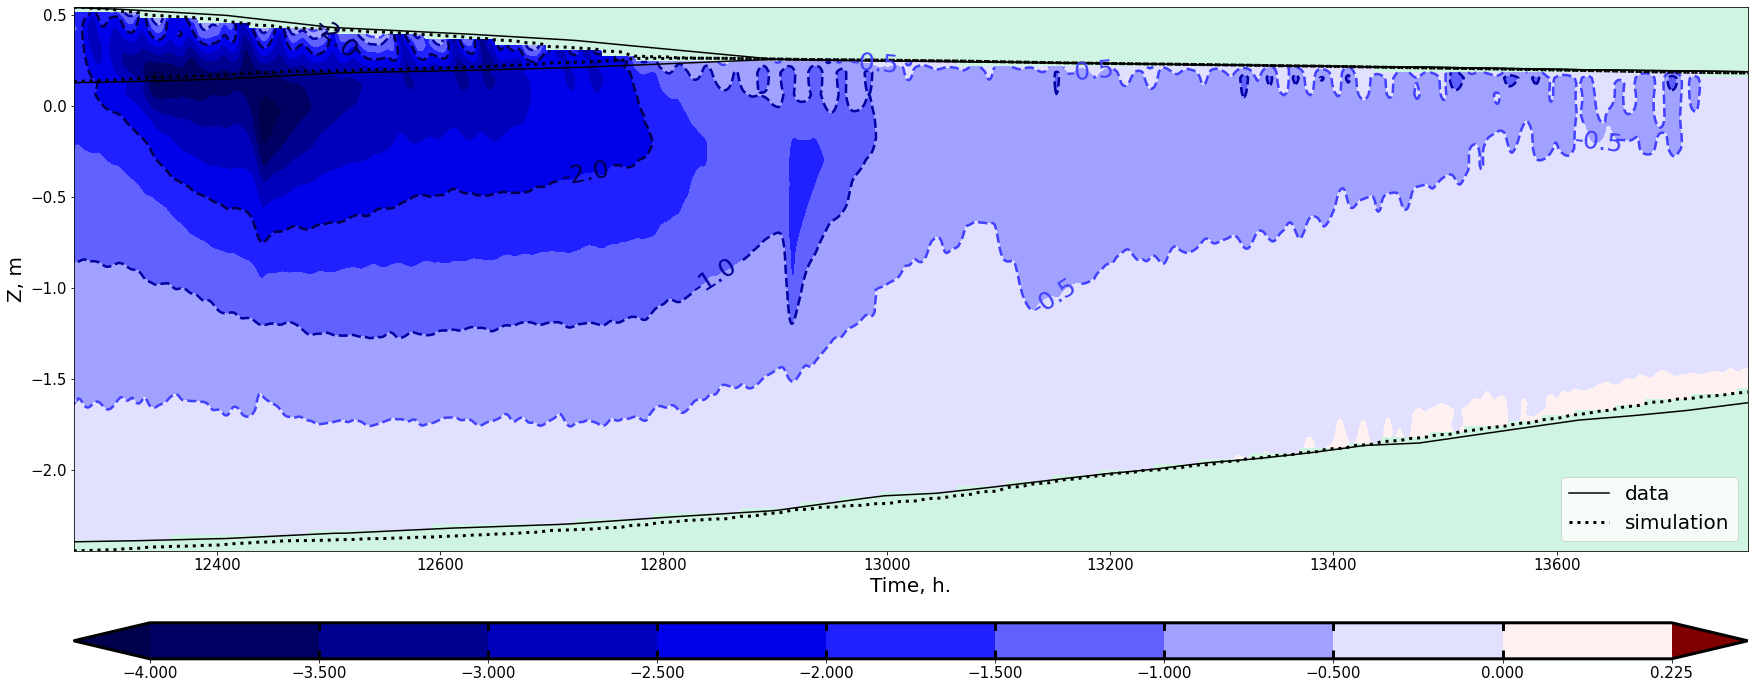

In [676]:
uv.timeseries_err(process_sim[5000:6500], process_data[5000:6500], tmin_err=-4., step_err=.5)

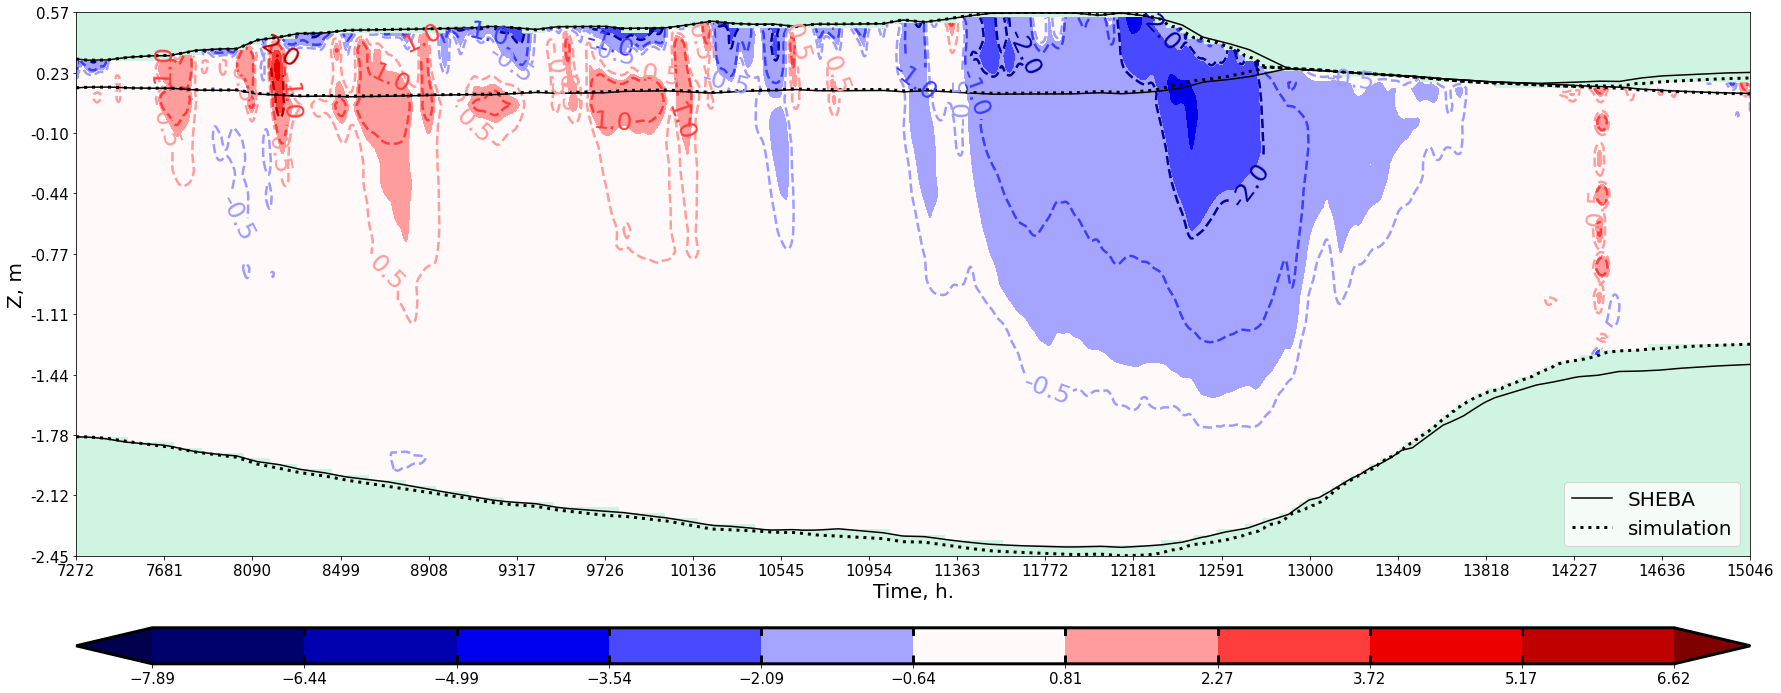

In [682]:
uv.timeseries_err(process_sim, process_data, x_ticks=20, y_ticks=10,
                  label_data='SHEBA', legend_loc='lower right')

In [16]:
k_unter = lambda T, S: 2.03 + 0.1172*S/T

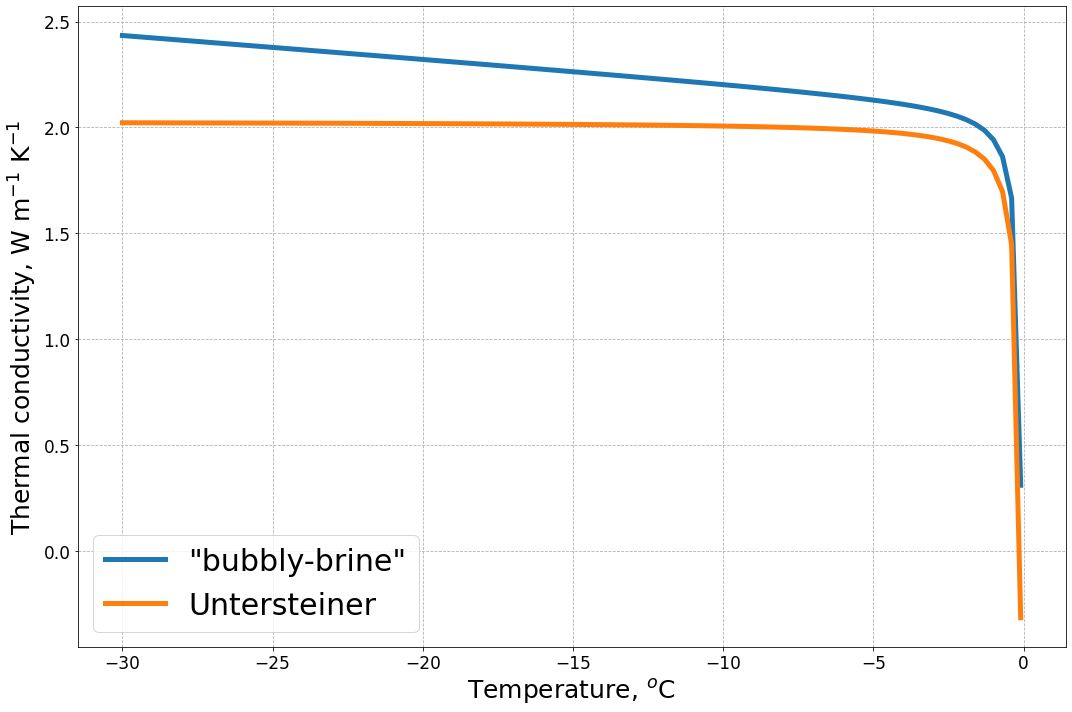

In [52]:
T = np.linspace(-30, -0.1, 100)

plt.figure(figsize=(15, 10))
# plt.title('Different thermal conductivity parametrizations, S = 2', size=20) 
plt.plot(T, [ue.k_i(t, 2) for t in T], label='"bubbly-brine"', lw=5)
plt.plot(T, k_unter(T, 2), label='Untersteiner', lw=5)
plt.xlabel(r'Temperature, $^o$C', size=25)
plt.ylabel(r'Thermal conductivity, W m$^{-1}$ K$^{-1}$', size=25)
plt.tick_params(labelsize=17)
plt.legend(prop={'size': 30}, loc='lower left')
plt.grid(ls='--')
plt.tight_layout()
plt.savefig('media/Untersteiner_vs_BB.png', dpi=200)
plt.show()